In [1]:
#bibliotecas de conexão ao dataset, analise, manipulação,visualização,aprendizagem de máquina


!pip install plotnine
!pip install -U scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import pickle
warnings.filterwarnings("ignore")
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Requirement already up-to-date: scikit-learn in c:\users\oem-user\anaconda3\lib\site-packages (0.24.0)


In [2]:
#carregando os dados do dataframe

df = pd.read_csv('Filmes_movie/movie_metadata.csv/movie_metadata.csv')

In [3]:
#15 primeiros dados 

df.head(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
#15 ultimos dados 

df.tail(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5028,Black and White,Ivan Kavanagh,12.0,83.0,18.0,0.0,Michael Parle,10.0,NaN,Horror,...,1.0,English,Ireland,NaN,10000.0,2007.0,5.0,6.7,1.33,105
5029,Color,Kiyoshi Kurosawa,78.0,111.0,62.0,6.0,Anna Nakagawa,89.0,94596.0,Crime|Horror|Mystery|Thriller,...,50.0,Japanese,Japan,NaN,1000000.0,1997.0,13.0,7.4,1.85,817
5030,Color,Tadeo Garcia,NaN,84.0,5.0,12.0,Michael Cortez,21.0,NaN,Drama,...,3.0,English,USA,NaN,NaN,2004.0,20.0,6.1,NaN,22
5031,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,NaN,Comedy|Horror|Thriller,...,8.0,English,USA,NaN,200000.0,2012.0,98.0,5.4,16.00,424
5032,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789.0,NaN,Crime|Drama,...,14.0,English,USA,NaN,NaN,1995.0,194.0,6.4,NaN,20
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


In [5]:
#informa como está a organização dos dados

df.index

RangeIndex(start=0, stop=5043, step=1)

In [6]:
#verificando quantas linhas de dados existe no dataframe

df.shape

(5043, 28)

In [7]:
#informações diversas sobre as colunas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [8]:
#nome de cada coluna

list (df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [9]:
#vendo o tipo de cada coluna

df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [10]:
#vendo valores faltante

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [11]:
#removendo a coluna movie imdb link


df.drop('movie_imdb_link',axis=1, inplace=True)

In [12]:
#valores da coluna color


df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [13]:
#removendo a coluna color

df.drop('color',axis=1, inplace=True)

In [14]:
#verificando se existem valores faltantes nos dados


df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [15]:
#verificando se existem valores faltantes nos dados


df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [16]:
#tira todas as linhas que tem valores faltantes


df.dropna(axis=0, subset=['director_name','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes',
                        'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster',
                        'num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords','title_year'],
         inplace=True)

In [17]:
#verificando quantas linhas de dados ainda estão no dataframe


df.shape

(4737, 26)

In [18]:
#verificando os valores na coluna content rating


df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [19]:
#substituindo os valores faltantes por 'R'


df['content_rating'].fillna('R', inplace=True)

In [20]:
#verificando os valores na coluna aspect ratio


df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
Name: aspect_ratio, dtype: int64

In [21]:
#substituindo os valores faltantes pela mediana dos valores


df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

In [22]:
#verificando os valores na coluna budget


df['budget'].value_counts()

20000000.0     172
30000000.0     141
15000000.0     140
25000000.0     140
40000000.0     130
              ... 
27220000.0       1
133000000.0      1
4300000.0        1
46000.0          1
218.0            1
Name: budget, Length: 424, dtype: int64

In [23]:
#substituindo os valores faltantes pela mediana dos valores

df['budget'].fillna(df['budget'].median(), inplace=True)

In [24]:
#verificando os valores na coluna gross

df['gross'].value_counts()

47000000.0     3
177343675.0    3
5773519.0      3
144512310.0    3
8000000.0      3
              ..
10965209.0     1
32416109.0     1
56443482.0     1
160762022.0    1
162.0          1
Name: gross, Length: 3972, dtype: int64

In [25]:
#substituindo os valores faltantes pela mediana dos valores

df['gross'].fillna(df['gross'].median(), inplace=True)

In [26]:
#verificando se removeu e substituiu todos os valores faltantes

df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [27]:
#verificando se temos valores duplicados

df.duplicated().sum()

42

In [28]:
#removendo os valores dupliacdos

df.drop_duplicates(inplace=True)

In [29]:
#verificando quantas linhas de dados ainda estão no dataframe

df.shape

(4695, 26)

In [30]:
#vendo os dados da coluna language

df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Swedish          4
Hebrew           4
Persian          4
Dutch            4
Norwegian        4
Thai             3
Arabic           3
None             2
Indonesian       2
Aboriginal       2
Zulu             2
Dari             2
Bosnian          1
Romanian         1
Aramaic          1
Vietnamese       1
Maya             1
Filipino         1
Dzongkha         1
Icelandic        1
Czech            1
Hungarian        1
Greek            1
Mongolian        1
Kazakh           1
Telugu           1
Polish           1
Name: language, dtype: int64

In [31]:
#removendo a coluna language

df.drop('language',axis=1, inplace=True)

In [32]:
#vendo os valores da coluna country

df['country'].value_counts()

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Denmark             11
Mexico              11
Brazil               8
South Africa         8
Norway               7
Netherlands          5
Sweden               5
Thailand             4
Argentina            4
Iran                 4
Belgium              3
West Germany         3
Israel               3
Czech Republic       3
Switzerland          3
Greece               2
Iceland              2
Poland               2
Hungary              2
Romania              2
Taiwan               2
Afghanistan          1
Peru                 1
Aruba                1
Georgia              1
Indonesia            1
Chile                1
Bahamas    

In [33]:
#removendo a coluna country

df.drop('country',axis=1, inplace=True)

In [34]:
#criando a coluna profit para saber qual foi o lucro real do filme

df['profit'] = df['budget'].sub(df['gross'], axis=0)

In [35]:
#verificando se a coluna foi criada corretamente

df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [36]:
#criando a coluna profit porcentage para saber a porcentagem do lucro

df['profit_porcentage'] = (df['profit']/df['gross'])*100

In [37]:
#verificando se a coluna foi criada corretamente

df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,profit_porcentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743


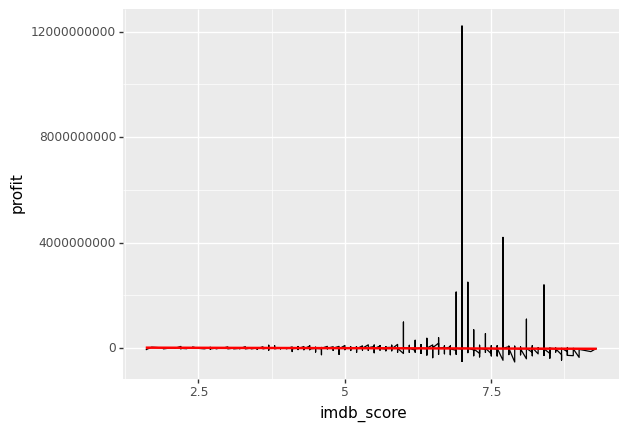

<ggplot: (138928413600)>

In [38]:
#criando gráfico de correlaciona lucro e nota do IMDB

ggplot(aes(x='imdb_score', y='profit'), data=df) +\
   geom_line() +\
   stat_smooth(colour='red', span=1)

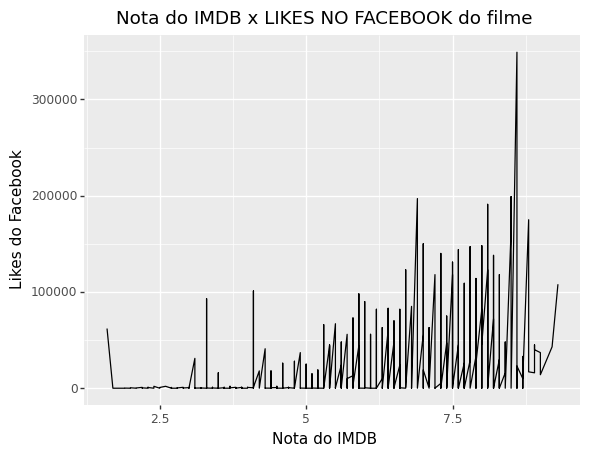

<ggplot: (138929934400)>

In [39]:
#criando gráfico de correlaciona likes no facebook do filme e nota do IMDB

(ggplot(df)+\
    aes(x='imdb_score', y='movie_facebook_likes') +\
    geom_line() +\
    labs(title='Nota do IMDB x LIKES NO FACEBOOK do filme', x='Nota do IMDB', y='Likes do Facebook'))

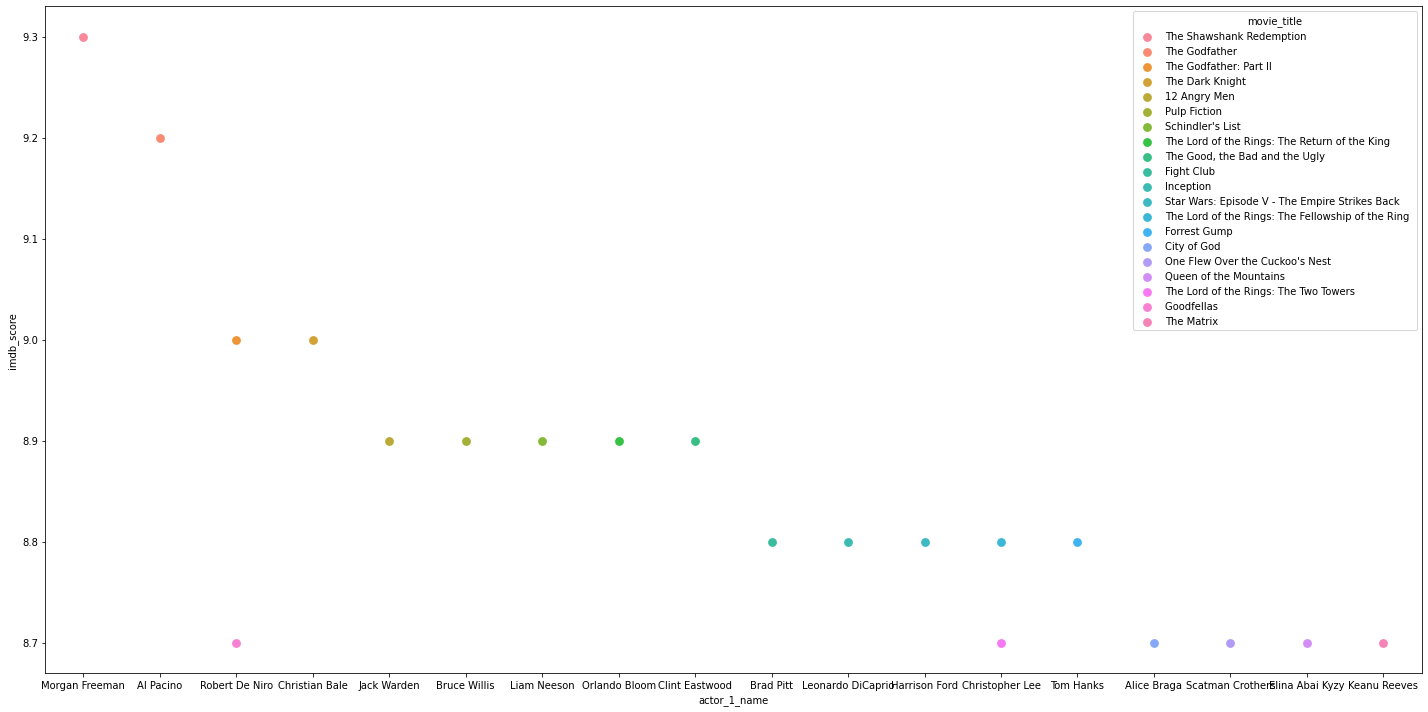

In [40]:
#gráfico dos 20 filmes com melhor nota com relação aos atores principais

plt.figure(figsize=(20,10))
df= df.sort_values(by='imdb_score', ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['actor_1_name'], df2['imdb_score'], hue=df2['movie_title'])
plt.tight_layout()
plt.show()

In [41]:
#retirando algumas colunas com dados categóricos


df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 
                 'actor_3_name', 'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [42]:
#verificando os valores na coluna genres

df['genres'].value_counts()

Drama                                209
Comedy                               186
Comedy|Drama|Romance                 182
Comedy|Drama                         180
Comedy|Romance                       149
                                    ... 
Comedy|Fantasy|Horror|Musical          1
Adventure|Drama|Family|Mystery         1
Adventure|Comedy|History|Romance       1
Comedy|Crime|Drama|Music|Romance       1
Action|Adventure|Romance|Thriller      1
Name: genres, Length: 875, dtype: int64

In [43]:
#removendo a coluna genres

df.drop('genres',axis=1, inplace=True)

In [44]:
#removendo as colunas que foram criadas protif e profit porcentage

df.drop(columns=['profit','profit_porcentage'], axis=1, inplace=True)

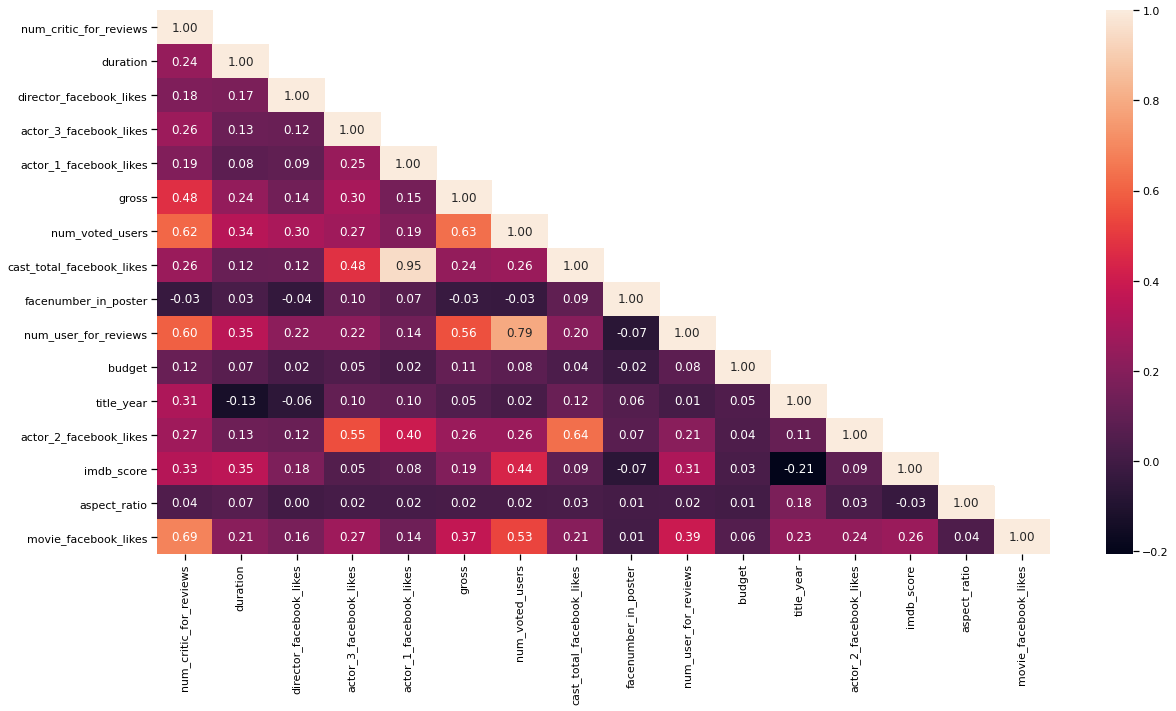

In [45]:
#verificando se existem colunas fortemente correlacionadas

corr= df.corr()
sns.set_context('notebook', font_scale=1.0, rc={'lines.linewidth':2.5})
plt.figure(figsize=(20,10))
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)]= True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')

In [46]:
#criando uma nova coluna combinando as duas colunas muito correlacionadas e fazendo tratamento


df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [47]:
#removendo as colunas


df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes',
                 'cast_total_facebook_likes'], axis=1, inplace=True)

In [48]:
#verificando se as colunas foi removida

df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes
1937,199.0,142.0,0.0,11000.0,28341469.0,1689764,0.0,4144.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0
3466,208.0,175.0,0.0,14000.0,134821952.0,1155770,1.0,2238.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0
2837,149.0,220.0,0.0,22000.0,57300000.0,790926,1.0,650.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0
66,645.0,152.0,22000.0,23000.0,533316061.0,1676169,0.0,4667.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0
4822,177.0,96.0,0.0,359.0,26005908.0,447785,1.0,888.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0


In [49]:
#criando uma nova coluna combinando as duas colunas muito correlacionadas e fazendo tratamento

df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

In [50]:
#removendo as colunas


df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

In [51]:
#verificando se as colunas foi removida

df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0,0.048021
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0,0.092940
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0,0.229231
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0,0.138204
4822,96.0,0.0,359.0,26005908.0,447785,1.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0,0.199324


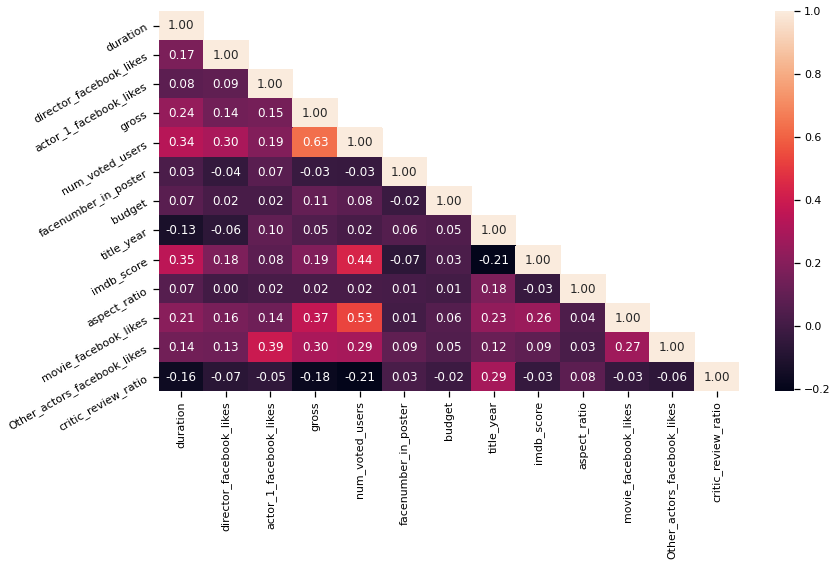

In [52]:
#verificando se ainda existem colunas fortemente correlacionadas com o mapa de calor

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [53]:
#criando a coluna imdb_binned_score, para dividir as colunas ruim,medio,bom,excelente pois imdb_score está em número
#categorizando os valores de nota do imdb


df['imdb_binned_score']=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [54]:
#verificando como ficou o dataframe

df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0,0.092940,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0,0.229231,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0,0.138204,4
4822,96.0,0.0,359.0,26005908.0,447785,1.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0,0.199324,4


In [55]:
#criando novas colunas para transformar os valores categóricos de 'content rating' (classificação indicativa)
#em valores numéricos


df = pd.get_dummies(data = df, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [56]:
#verificando como ficou o dataframe

df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,9.3,1.85,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,9.2,1.85,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,9.0,1.85,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,9.0,2.35,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,8.9,1.66,...,1,0,0,0,0,0,0,0,0,0


In [57]:
#vendo as colunas diferente do existe no imdb_score_rating

df[df.columns.difference(['imdb_binned_score'])].columns

Index(['Other_actors_facebook_likes', 'actor_1_facebook_likes', 'aspect_ratio',
       'budget', 'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       'content_rating_Unrated', 'content_rating_X', 'critic_review_ratio',
       'director_facebook_likes', 'duration', 'facenumber_in_poster', 'gross',
       'imdb_score', 'movie_facebook_likes', 'num_voted_users', 'title_year'],
      dtype='object')

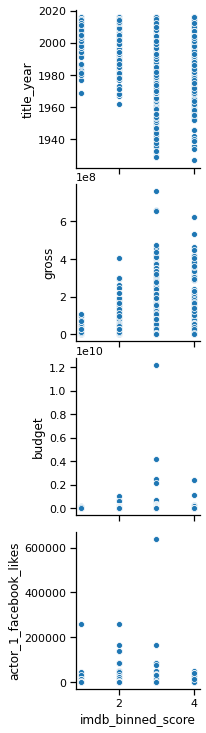

In [58]:
sns.pairplot(x_vars='imdb_binned_score', y_vars=['title_year', 'gross', 'budget', 'actor_1_facebook_likes'], data=df)

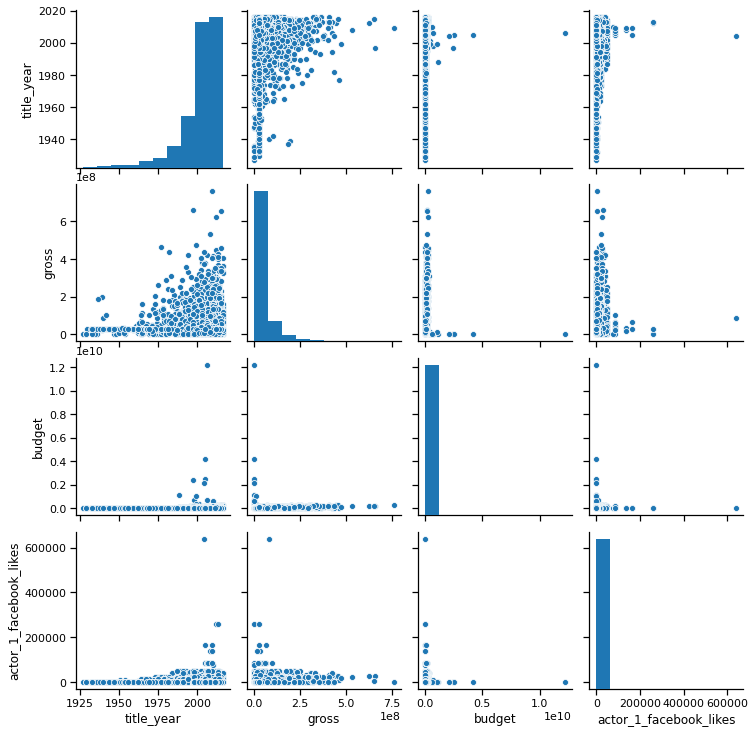

In [59]:
variaveis = ['title_year', 'gross', 'budget', 'actor_1_facebook_likes']
sns.pairplot(df[variaveis])

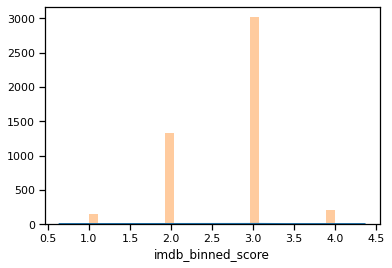

In [60]:
sns.distplot(df['imdb_binned_score'])
sns.distplot(df['imdb_binned_score'], kde=False) 

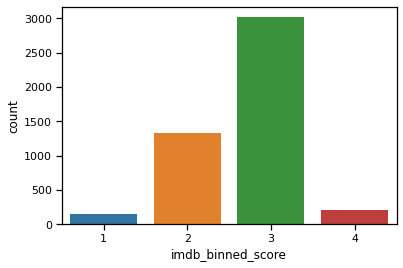

In [61]:
sns.countplot(x='imdb_binned_score', data=df)

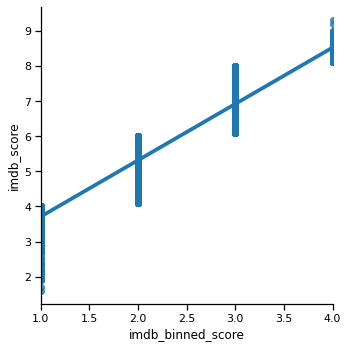

In [62]:
sns.lmplot(x='imdb_binned_score', y='imdb_score', data=df)

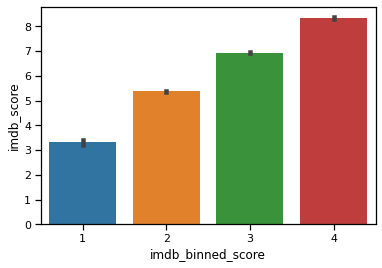

In [63]:
sns.barplot(x='imdb_binned_score', y='imdb_score', data=df,)

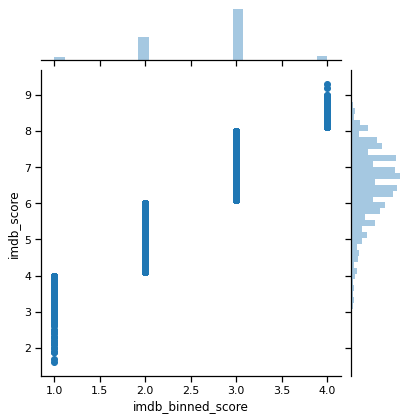

In [64]:
sns.jointplot(x='imdb_binned_score', y='imdb_score', data=df)

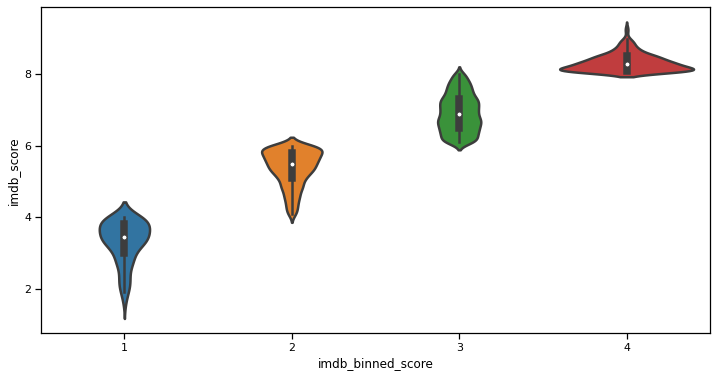

In [65]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='imdb_binned_score', y='imdb_score', data=df)

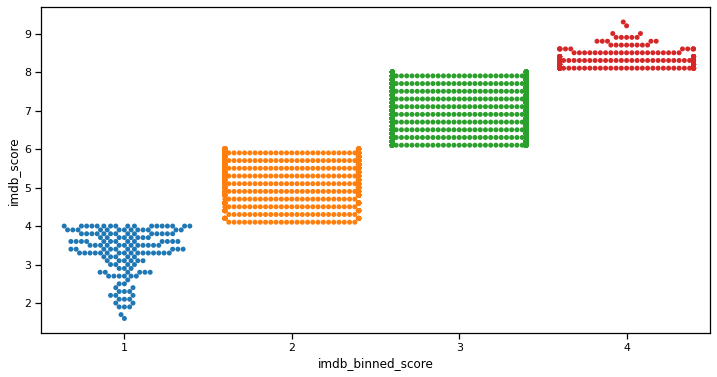

In [66]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='imdb_binned_score', y='imdb_score', data=df)

Text(0.5, 1.0, 'Pontuação do imdb')

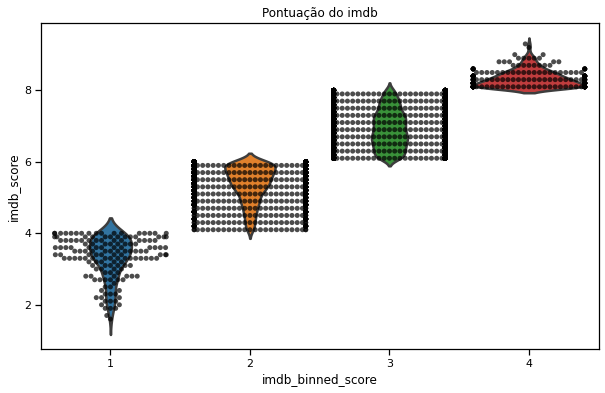

In [67]:
plt.figure(figsize=(10,6))
 
sns.violinplot(x='imdb_binned_score', y='imdb_score', data=df, inner=None)

sns.swarmplot(x='imdb_binned_score', y='imdb_score', data=df, color='k', alpha=0.7)
 
plt.title('Pontuação do imdb')

In [68]:
#separando as variaveis entre preditoras e variavel alvo


#escolhendo a(s) coluna(s) do dataframe que serão a resposta do modelo
y = pd.DataFrame(columns=['imdb_binned_score'], data=df)

#escolhendo as colunas do dataframe que serão nossos valores de entrada para o modelo
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross',
                        'num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio',
                        'movie_facebook_likes','Other_actors_facebook_likes','critic_review_ratio',
                        'content_rating_G','content_rating_GP',
                        'content_rating_M','content_rating_NC-17','content_rating_Not Rated',
                        'content_rating_PG','content_rating_PG-13','content_rating_Passed',
                        'content_rating_R','content_rating_TV-14','content_rating_TV-G',
                        'content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=df)

In [69]:
#dividindo os dados em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
#normalizando os dados

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [71]:
#verificando se normalizou

X.isna().sum()

duration                       0
director_facebook_likes        0
actor_1_facebook_likes         0
gross                          0
num_voted_users                0
facenumber_in_poster           0
budget                         0
title_year                     0
aspect_ratio                   0
movie_facebook_likes           0
Other_actors_facebook_likes    0
critic_review_ratio            0
content_rating_G               0
content_rating_GP              0
content_rating_M               0
content_rating_NC-17           0
content_rating_Not Rated       0
content_rating_PG              0
content_rating_PG-13           0
content_rating_Passed          0
content_rating_R               0
content_rating_TV-14           0
content_rating_TV-G            0
content_rating_TV-PG           0
content_rating_Unrated         0
content_rating_X               0
dtype: int64

In [72]:
X.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio,movie_facebook_likes,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,1.85,108000,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,1.85,43000,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,1.85,14000,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,2.35,37000,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,1.66,40000,...,1,0,0,0,0,0,0,0,0,0


In [73]:
y.value_counts()

imdb_binned_score
3                    3015
2                    1323
4                     203
1                     154
dtype: int64

In [74]:
#configurando e treinando o modelo de regressão 

logit =LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [75]:
#verificando os valores preditos


y_pred

array([3, 3, 3, ..., 2, 3, 3], dtype=int64)

In [76]:
#calculando a matriz de confusão

cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)

In [77]:
cnf_matrix

array([[  0,  28,  17,   0],
       [  1, 159, 232,   0],
       [  3, 103, 789,   9],
       [  0,   0,  31,  37]], dtype=int64)

In [111]:
#código para melhor visualização da matriz de confusão
#outra alternativa só print(cnf_matrix)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize = True`..
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo verdadeiro')
    plt.xlabel('Rótulo previsto')
    plt.tight_layout()

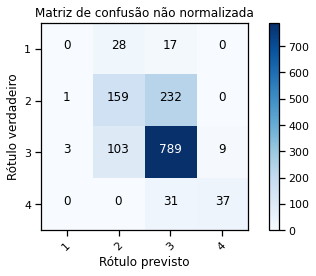

In [112]:
#imprimindo a matriz de confusão


plot = plot_confusion_matrix(cnf_matrix, classes=['1','2', '3', '4'],
                      title='Matriz de confusão não normalizada', normalize=False)

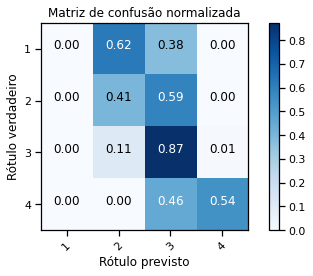

In [113]:
#imprimindo a matriz de confusão


plot = plot_confusion_matrix(cnf_matrix, classes=['1','2', '3', '4'],
                      title='Matriz de confusão normalizada', normalize=True)

In [114]:
#verificando quantos valores existem de cada categoria em 'imdb_binned_score'

df['imdb_binned_score'].value_counts()

3    3015
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64

In [115]:
#métricas finais


print(metrics.classification_report(y_test, y_pred, target_names=['1','2', '3', '4']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.55      0.41      0.47       392
           3       0.74      0.87      0.80       904
           4       0.80      0.54      0.65        68

    accuracy                           0.70      1409
   macro avg       0.52      0.46      0.48      1409
weighted avg       0.66      0.70      0.67      1409



In [116]:
#definindo em qual caminho vamos salvar o modelo


modelo_treinado = 'modelo_imdb.sav'

In [117]:
#salvando o modelo


pickle.dump(logit, open(modelo_treinado, 'wb'))

In [118]:
#carregando o modelo treinado


modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [119]:
#Olhando o conteúdo de um vetor de teste


X_test[5]

array([-1.27823022, -0.24065154, -0.481899  , -0.30758048, -0.53732685,
       -0.66285251, -0.25440639,  0.47822401,  0.34238844, -0.38651028,
       -0.36028013,  0.1771762 , -0.14967295, -0.04276995, -0.03491087,
       -0.04276995, -0.14093771,  2.43567023, -0.65997074, -0.03903749,
       -0.95127679, -0.0302291 , -0.0302291 , -0.01744746, -0.11240473,
       -0.05240624])

In [120]:
#fazendo predição do novo dado com o modelo carregado


modelo_carregado.predict([X_test[5]])

array([2], dtype=int64)